# Exercise 1a 

## Part I
## Implicit Midpoint Rule

The implicit midpoint method is given by the formula 
$$y_{n+1} = y_n + hf(t_n + 0.5*h, 0.5 * (y_n + y_{n+1}))$$

Where $$t_{n+1} = t_n + h$$

In [1]:
from math import exp, sqrt
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import platform
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Visualize output using a log-log plot
def visualize(plot_x, plot_y, exact_y):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.loglog(plot_x, plot_y, 'ro', plot_x, exact_y)
    ax.set_xlabel('x', fontsize = 15)
    ax.set_ylabel('f(x)', fontsize = 15)
    ax.legend(["Implicit Midpoint", "Analytical Solution"])

In [3]:
# Return a representation of the differential equation
def derivative(x, y):
    return -2 * y

In [4]:
# Return the exact solution of the differential equation
def exact_solution(x, y):
    return exp(-x*2)

In [5]:
def main(x, y, h):
    x = [x]
    y = [y]
    exact_y = [y]
    i = 1
    y_0 = 0
    
    def solver(y_n):
        return y[i-1] - y_n + h * derivative(x[i-1]+h/2, (y[i-1]+y_n)/2)
    
    while i < 30:
        x_temp = x[i-1] + h
        y_temp = fsolve(solver, y[i-1])
        
        exact_y.append(exact_solution(x[i-1], y[i-1]))
        
        x.append(x_temp)
        y.append(y_temp)
        i += 1
    
    print('Python version: %s' % (platform.python_version()))
    return x, y, exact_y

Python version: 3.7.6


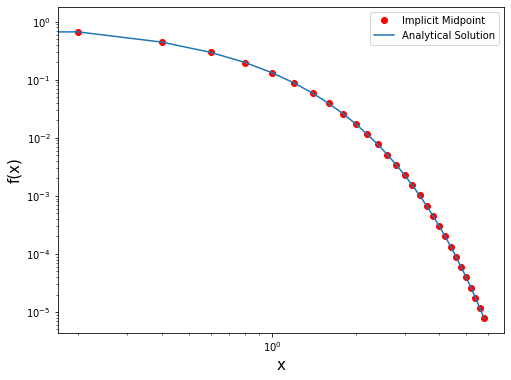

In [6]:
if __name__ == "__main__":
    x = 0
    y = 1
    h = 0.2
    plot_x, plot_y, exact_y = main(x, y, h)
    visualize(plot_x, plot_y, exact_y[0]);

## Part II

## Two Stage Gauss Method

The Gauss–Legendre method of order four also known as the two stage Gauss method is given by the formula below 

$$k1 = hf(y_n + (1/4)*k1 + (1/4 - (√3)/6)*k2, x_n + (1/2 - (√3)/6)*h)$$

$$k2 = hf(y_n + (1/4)*k2 + (1/4 + (√3)/6)*k1, x_n + (1/2 + (√3)/6)*h)$$

$$y_n+1 = y+n + (1/2)*k1 + (1/2)*k2$$

In [7]:
# Visualize output using a log-log plot
def visualize(plot_x, plot_y, exact_y):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.loglog(plot_x, plot_y, 'ro', plot_x, exact_y)
    ax.set_xlabel('x', fontsize = 15)
    ax.set_ylabel('f(x)', fontsize = 15)
    ax.legend(["Gauss Method", "Analytical Solution"])

In [8]:
# Return a representation of the differential equation
def derivative(x, y):
    return -2 * y

In [9]:
# Return the exact solution of the differential equation
def exact_solution(x, y):
    return exp(-x*2)

In [10]:
def main(x, y, h):
    x = [x]
    y = [y]
    exact_y = [y]
    i = 1
    y_0 = 0
    
    def solver(p):
        k1, k2 = p
        return (
            k1 - h*derivative(x[i-1]+(1/2-((sqrt(3)/6))*h), y[i-1]+(1/4)*k1+((1/4-((sqrt(3)/6))*k2))),
            k2 - h*derivative(x[i-1]+(1/2+((sqrt(3)/6))*h), y[i-1]+(1/4)*k2+((1/4+((sqrt(3)/6))*k1)))
        )
    
    while i < 10:
        x_temp = x[i-1] + h

        k1, k2 = fsolve(solver, (1, 1))

        y_temp = y[i-1] + 0.5*k1 + 0.5*k2
        
        x.append(x_temp)
        y.append(y_temp)
        exact_y.append(exact_solution(x[i-1], y[i-1]))
        i += 1
    
    print('Python version: %s' % (platform.python_version()))
    return x, y, exact_y

Python version: 3.7.6


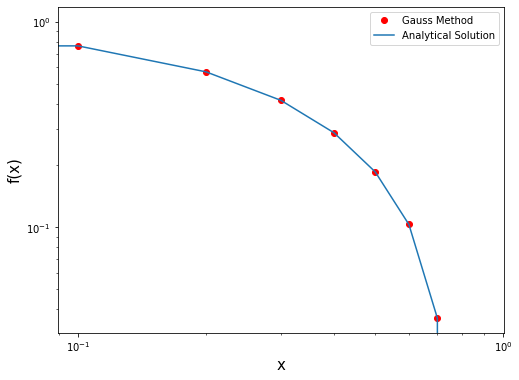

In [11]:
if __name__ == "__main__":
    x = 0
    y = 1
    h = 0.1
    plot_x, plot_y, exact_y = main(x, y, h)
    visualize(plot_x, plot_y, exact_y[0]);